In [121]:
import pandas as pd
import numpy as np

In [122]:
df= pd.read_csv('final_df.csv')
target = df['LaptopPrice']
df.drop(columns=['LaptopPrice'], inplace = True)
pd.set_option('display.max_columns', None)
df

,Inches,ScreenResolution,Cpu,Ram,Weight,TouchScreen,HDD,SSD,SSHD,FStorage,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13.3,11,15,8,1.37,0,0,128,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,13.3,2,15,8,1.34,0,0,0,0,128,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,15.6,4,15,8,1.86,0,0,256,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,15.4,12,16,16,1.83,0,0,512,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,13.3,11,15,8,1.37,0,0,256,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,14.0,4,16,4,1.80,1,0,128,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1298,13.3,13,16,16,1.30,1,0,512,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1299,14.0,1,10,2,1.50,0,0,0,0,64,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1300,15.6,1,16,6,2.19,0,1000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [123]:
print(df['HDD'].unique())
print(df['SSD'].unique())
print(df['SSHD'].unique())
print(df['FStorage'].unique())

[   0  500 1000 2000   32  128]
[ 128    0  256  512   32   64 1000   16  768  180  240    8]
[   0 1000  508]
[  0 128 256  32  64  16 512]


# Splitting data

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=0)


# Modelling 

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def get_mae_random(max_leaf_nodes,X_train, X_test, y_train, y_test ):
    model1 = RandomForestRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model1.fit(X_train,y_train)
    model1_preds = model1.predict(X_test)
    print("R2 score: %.2f"%(r2_score(y_test,model1_preds)))
    mae = mean_absolute_error(y_test, model1_preds)
    return (mae)

for max_leaf_nodes in [5,10,20,50,100,200,300, 500]:
    mae = get_mae_random(max_leaf_nodes,X_train,X_test,y_train,y_test)
    print("Max leaf nodes: %d \t\t MAE: %d\n"%(max_leaf_nodes, mae))



R2 score: 0.62
Max leaf nodes: 5 		 MAE: 292

R2 score: 0.69
Max leaf nodes: 10 		 MAE: 256

R2 score: 0.72
Max leaf nodes: 20 		 MAE: 237

R2 score: 0.73
Max leaf nodes: 50 		 MAE: 222

R2 score: 0.73
Max leaf nodes: 100 		 MAE: 217

R2 score: 0.73
Max leaf nodes: 200 		 MAE: 216

R2 score: 0.73
Max leaf nodes: 300 		 MAE: 216

R2 score: 0.73
Max leaf nodes: 500 		 MAE: 216



In [126]:
from sklearn.tree import DecisionTreeRegressor

def get_mae_decision(max_leaf_nodes,X_train, X_test, y_train, y_test ):
    model1 = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model1.fit(X_train,y_train)
    model1_preds = model1.predict(X_test)
    print("R2 score: %.2f"%(r2_score(y_test,model1_preds)))
    mae = mean_absolute_error(y_test, model1_preds)
    return (mae)

for max_leaf_nodes in [5,10,20,50,100,200,300, 500]:
    mae = get_mae_decision(max_leaf_nodes,X_train,X_test,y_train,y_test)
    print("Max leaf nodes: %d \t\t MAE: %d\n"%(max_leaf_nodes, mae))

R2 score: 0.56
Max leaf nodes: 5 		 MAE: 321

R2 score: 0.66
Max leaf nodes: 10 		 MAE: 273

R2 score: 0.67
Max leaf nodes: 20 		 MAE: 265

R2 score: 0.67
Max leaf nodes: 50 		 MAE: 253

R2 score: 0.68
Max leaf nodes: 100 		 MAE: 247

R2 score: 0.68
Max leaf nodes: 200 		 MAE: 243

R2 score: 0.67
Max leaf nodes: 300 		 MAE: 246

R2 score: 0.67
Max leaf nodes: 500 		 MAE: 248



In [127]:
from sklearn.linear_model import LinearRegression

model2=LinearRegression()

model2.fit(X_train,y_train)

preds=model2.predict(X_test)

r2score=r2_score(y_test,preds)
MAE = mean_absolute_error(y_test, preds)

print("R2 score: %.2f"%(r2score))
print("MAE: %d"%(MAE))



R2 score: 0.75
MAE: 253


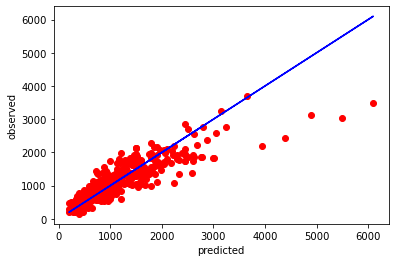

In [128]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots()
 

plt.xlabel('predicted')
plt.ylabel('observed')


plt.scatter(y_test,preds, color='red')
plt.plot(y_test,y_test, color='blue')

In [129]:
from xgboost import XGBRegressor

model3 = XGBRegressor()

model3.fit(X_train,y_train)

preds3=model3.predict(X_test)

r2score=r2_score(y_test, preds3)
MAE = mean_absolute_error(y_test, preds3)

print("R2 score: %.2f"%(r2score))
print("MAE: %d"%(MAE))



R2 score: 0.75
MAE: 203


C:\Users\ILLEGEAR\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


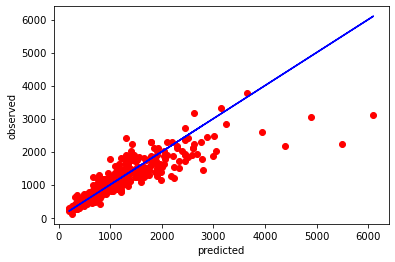

In [130]:
fig, ax= plt.subplots()
plt.xlabel('predicted')
plt.ylabel('observed')


plt.scatter(y_test,preds3, color='red')
plt.plot(y_test,y_test, color='blue')

# Model using XGBoost will be selected, due to lower MAE score and higher R2

In [131]:
import joblib

joblib.dump(model3,'XGB_model') #save model as reg_model file

['XGB_model']